# Predict House Price

In [95]:
import sklearn as s
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [96]:
data = pd.read_csv('data/home_data.csv')

In [97]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [98]:
y=data['price'].tolist()
x=data['sqft_living'].tolist()

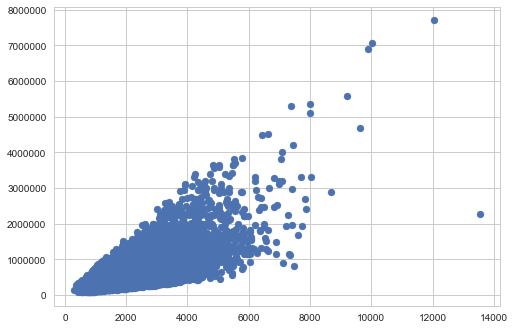

In [99]:
plt.scatter(x,y)
#plt.axis([500,100000,100000,1200000])
plt.show()

In [100]:
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

# Create a simple regression model of sqft_living to price

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [102]:
features=data[['bedrooms','sqft_living','yr_built']]
response=data['price']

In [103]:
features.head()

,bedrooms,sqft_living,yr_built
0,3,1180,1955
1,3,2570,1951
2,2,770,1933
3,4,1960,1965
4,3,1680,1987


In [104]:
response.head()

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

Split data into training and testing.  


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,response, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 3)
(5404, 3)
(16209,)
(5404,)


## Build the regression model using only sqft_living as a feature

In [106]:
X=X_train['sqft_living']
y=y_train

In [107]:
X.values.reshape(-1,1)

array([[1010],
       [2110],
       [3030],
       ..., 
       [1970],
       [1980],
       [3760]], dtype=int64)

In [108]:
y.values

array([ 290000,  345950,  700000, ...,  650000,  437000, 1025000], dtype=int64)

In [109]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X.values.reshape(-1,1),y.values)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evaluate the simple model

In [110]:
print(y_test.mean())

548075.5299777943


In [111]:
xts = X_test['sqft_living']

In [112]:
y_pred = reg1.predict(xts.values.reshape(-1,1))

In [113]:
X.values

array([1010, 2110, 3030, ..., 1970, 1980, 3760], dtype=int64)

In [114]:
y_pred

array([ 733546.34037914,  414899.21983987,  618174.10708044, ...,
        684101.09753684,  302273.94447685,  305020.90241254])

In [115]:
y_test.values

array([ 459000,  445000, 1057000, ...,  725000,  253500,  324950], dtype=int64)

### Lets calculate the RMSE

In [116]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(xts,y_pred))


600138.6492749475

RMSE is not good, we have to minimize. For that we can add more features and see if it lesser than this or not

# Let's show what our predictions look like

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

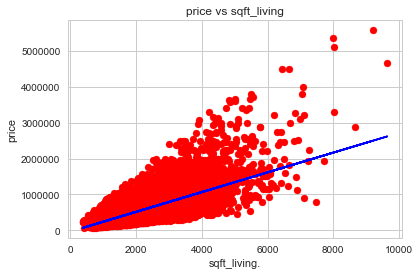

In [150]:
plt.scatter(X.values,y_train.values,color='red')
plt.plot(X.values,reg1.predict(X.values.reshape(-1,1)),color='blue')
plt.title('price vs sqft_living')
plt.xlabel('sqft_living.')
plt.ylabel('price')
plt.show()

Above:  red dots are original data, blue line is the prediction from the simple regression.

Below: we can view the learned regression coefficients and intercept

In [121]:
reg1.coef_

array([ 274.69579357])

In [123]:
reg1.intercept_

-32854.923676522332

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [124]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [125]:
data[my_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074


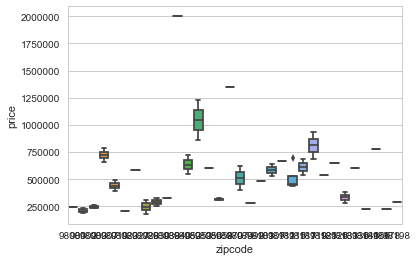

In [126]:
import seaborn as sns
sns.set_style("whitegrid")
ax=sns.boxplot(x=data['zipcode'].head(50),y=data['price'].head(50))
plt.show()

Above plot shows Price corresponding to zipcodes, which give the insight of area(locality) i.e which area(zipcode) has more cost compare to other areas. 
we just took the first 50 sample of all datas available for sake of visibility.

# Build a regression model with more features

In [127]:
features=data[my_features]
X_train, X_test, y_train, y_test = train_test_split(features,response, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 6)
(5404, 6)
(16209,)
(5404,)


In [128]:
print(my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [129]:
reg2=LinearRegression()
reg2.fit(X_train,y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
y_pred = reg2.predict(X_test)

In [131]:
y_pred

array([ 721189.21888219,  383424.69661344,  631825.92608447, ...,
        713733.47171944,  246847.97054607,  375717.25246601])

In [132]:
y_test.values

array([ 459000,  445000, 1057000, ...,  725000,  253500,  324950], dtype=int64)

## Comparing the results of the simple model with adding more features

In [133]:
math.sqrt(mean_squared_error(y_test.values,y_pred))

276381.92131855735

SO, RMSE decreases from 603243.3370145634 to 276381.92131855735 with more features.

In [144]:
reg2.coef_

array([ -5.45328651e+04,   9.72904656e+03,   3.09919030e+02,
        -2.72865571e-01,   3.74154830e+02,   5.87102914e+02])

In [145]:
reg2.intercept_

-57521193.273763172

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [134]:
house1 = data[data['id']==5309101200]

In [135]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [136]:
print(house1['price'])

1054    620000
Name: price, dtype: int64


In [138]:
print(reg2.predict(house1[my_features])) # Predicting model with more features

[ 630249.35035545]


In [143]:
print(reg1.predict(house1['sqft_living'].values.reshape(-1,1))) # predicting model with only one feature i.e "sqt_living"

[ 626414.98088749]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [165]:
house2 = data[data['id']==1925069082]

In [166]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [169]:
print(reg2.predict(house2[my_features]))

[ 1246683.55761619]


In [174]:
print(reg1.predict(house2['sqft_living'].values.reshape(-1,1)))

[ 1241733.55848057]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [175]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [180]:
df=pd.DataFrame(bill_gates)
df

,bathrooms,bedrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,25,8,10,4,10,47.627606,-122.242054,37500,12500,50000,5000,225000,40000,4,1,1994,2010,98039


In [182]:
print(reg2.predict(df[my_features]))

[ 15280805.97011948]


The model predicts a price of over $15M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)